In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [2]:
np.random.seed(0)
time_index = pd.date_range(start='2022-01-02', end='2023-01-01', freq='D')
data = np.random.randn(len(time_index)).cumsum()
ts = pd.Series(data, index=time_index)

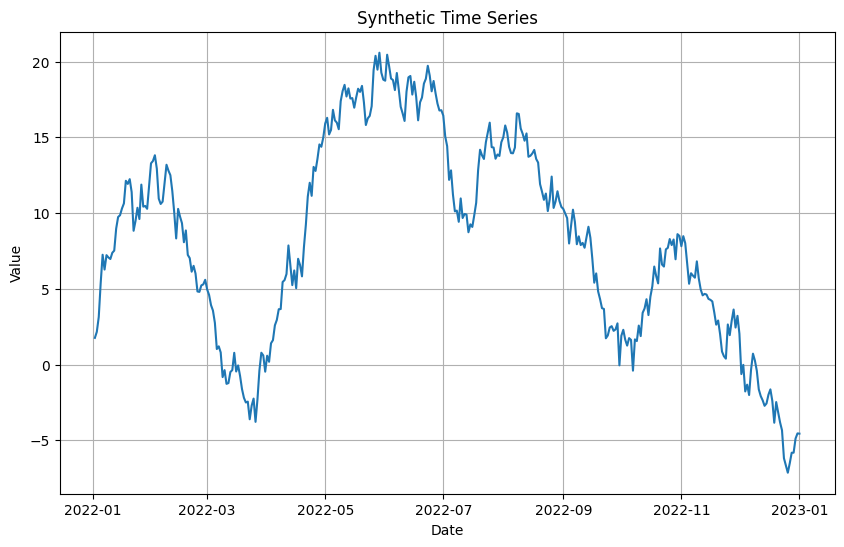

In [3]:
plt.figure(figsize=(10,6))
plt.plot(ts)
plt.title("Synthetic Time Series")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [4]:
adf_result = adfuller(ts)
print("ADF Statistic: ", adf_result[0])
print('p-value: ', adf_result[1])
print("Critical Values: ")
for key, value in adf_result[4].items():
    print(f'{key}: {value}')

ADF Statistic:  -0.9200020663522939
p-value:  0.7813141076934438
Critical Values: 
1%: -3.4484434475193777
5%: -2.869513170510808
10%: -2.571017574266393


In [5]:
order = (2, 2, 2) # ARIMA order (p, d, q)
model = ARIMA(ts, order=order)
fit_model = model.fit()

/Users/jorocca/tf_env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/jorocca/tf_env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [10]:
forecast_steps = 60
forecast_object = fit_model.get_forecast(steps=forecast_steps)
forecast = forecast_object.predicted_mean  # Extract forecast values
conf_int = forecast_object.conf_int()

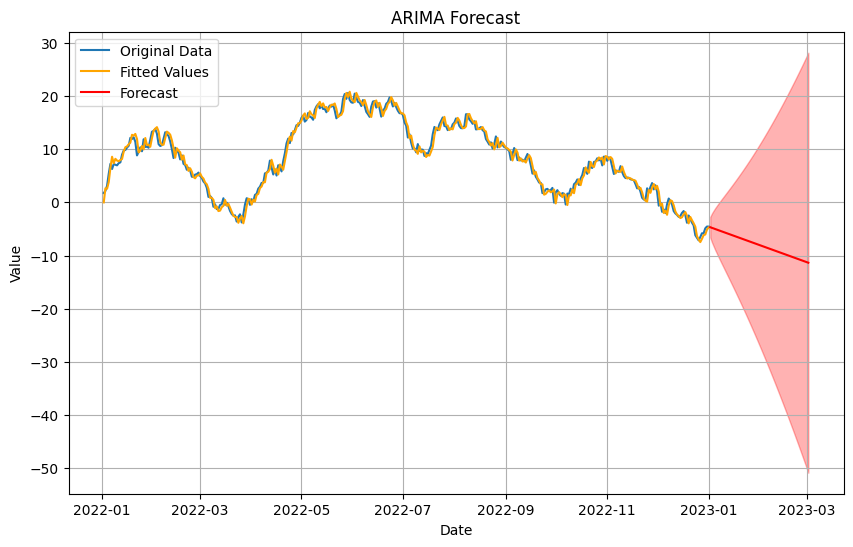

In [12]:
plt.figure(figsize=(10,6))
plt.plot(ts, label="Original Data")
plt.plot(fit_model.fittedvalues, label="Fitted Values", color="orange")
plt.plot(forecast, label="Forecast", color="red")
plt.title("ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.fill_between(forecast.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='r', alpha=0.3)  
plt.show()